
### Required packages
- NumPy
- Pandas
- Matplotlib
- seaborn
- sklearn
- python-graphviz

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix

import sklearn.tree
from sklearn.ensemble import RandomForestClassifier

import graphviz
import scipy.stats as st

In [ ]:
plt.style.use('seaborn')

# Constants

In [ ]:
FILE_PATH = "./COVID-19 Survey Student Responses.csv"

# Read in the data

In [ ]:
df = pd.read_csv(FILE_PATH)

# Data Cleaning

In [ ]:
df.loc[df['Time spent on TV'] == 'No tv', 'Time spent on TV'] = '0'
df.loc[df['Time spent on TV'] == 'N', 'Time spent on TV'] = '0'
df.loc[df['Time spent on TV'] == 'n', 'Time spent on TV'] = '0'
df.loc[df['Time spent on TV'] == ' ', 'Time spent on TV'] = '0'

df['Time spent on TV'] = df['Time spent on TV'].astype(float)

In [ ]:
# Excellent => 5
# Good => 4
# Average => 3
# Poor => 2
# Very Poor => 1

df.loc[df['Rating of Online Class experience'] == 'Excellent', 'Rating of Online Class experience'] = '5'
df.loc[df['Rating of Online Class experience'] == 'Good', 'Rating of Online Class experience'] = '4'
df.loc[df['Rating of Online Class experience'] == 'Average', 'Rating of Online Class experience'] = '3'
df.loc[df['Rating of Online Class experience'] == 'Poor', 'Rating of Online Class experience'] = '2'
df.loc[df['Rating of Online Class experience'] == 'Very poor', 'Rating of Online Class experience'] = '1'

df['Rating of Online Class experience'] = df['Rating of Online Class experience'].astype(float)


In [ ]:
# Increased => + 1
# Decreased => - 1
# Remain Constant => 0
df.loc[df['Change in your weight'] == 'Increased', 'Change in your weight'] = '1'
df.loc[df['Change in your weight'] == 'Decreased', 'Change in your weight'] = '-1'
df.loc[df['Change in your weight'] == 'Remain Constant', 'Change in your weight'] = '0'

df['Change in your weight'] = df['Change in your weight'].astype(float)

In [ ]:
# No => 0
# Yes => 1
df.loc[df['Health issue during lockdown'] == 'NO', 'Health issue during lockdown'] = '0'
df.loc[df['Health issue during lockdown'] == 'YES', 'Health issue during lockdown'] = '1'

df['Health issue during lockdown'] = df['Health issue during lockdown'].astype(int)

In [ ]:
# No => 0
# Yes => 1
df.loc[df['Time utilized'] == 'NO', 'Time utilized'] = '0'
df.loc[df['Time utilized'] == 'YES', 'Time utilized'] = '1'

df['Time utilized'] = df['Time utilized'].astype(int)

In [ ]:
# No => 0
# Yes => 1
df.loc[df['Do you find yourself more connected with your family, close friends , relatives  ?'] ==
       'NO', 'Do you find yourself more connected with your family, close friends , relatives  ?'] = '0'

df.loc[df['Do you find yourself more connected with your family, close friends , relatives  ?'] ==
       'YES', 'Do you find yourself more connected with your family, close friends , relatives  ?'] = '1'

df['Do you find yourself more connected with your family, close friends , relatives  ?'] = df['Do you find yourself more connected with your family, close friends , relatives  ?'].astype(int)

# Analysis

In [ ]:
# Age Group 1: 7-17
# Age Group 2: 18-22
# Age Group 3: 23-59
ageGroup1 = df[(df['Age of Subject'] >= 7) & (df['Age of Subject'] <= 17)]
ageGroup2 = df[(df['Age of Subject'] >= 18) & (df['Age of Subject'] <= 22)]
ageGroup3 = df[(df['Age of Subject'] >= 23) & (df['Age of Subject'] <= 59)]

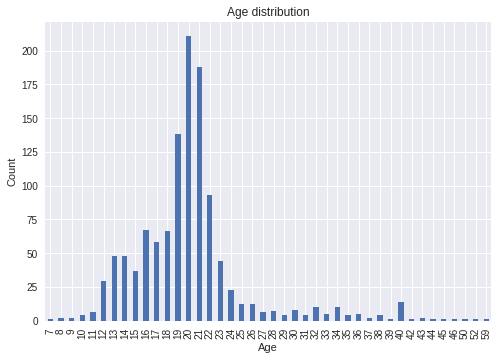

In [ ]:
# Age distribution
df['Age of Subject'].value_counts().sort_index().plot(kind='bar', title='Age distribution', xlabel='Age', ylabel='Count')
plt.savefig('Age distribution.svg', )
plt.show()

In [ ]:
df['Health issue during lockdown'].value_counts()

0    1021
1     161
Name: Health issue during lockdown, dtype: int64

In [ ]:
len(df[df['Health issue during lockdown'] == 1]) / len(df), len(df[df['Health issue during lockdown'] == 1]), len(df)

(0.1362098138747885, 161, 1182)

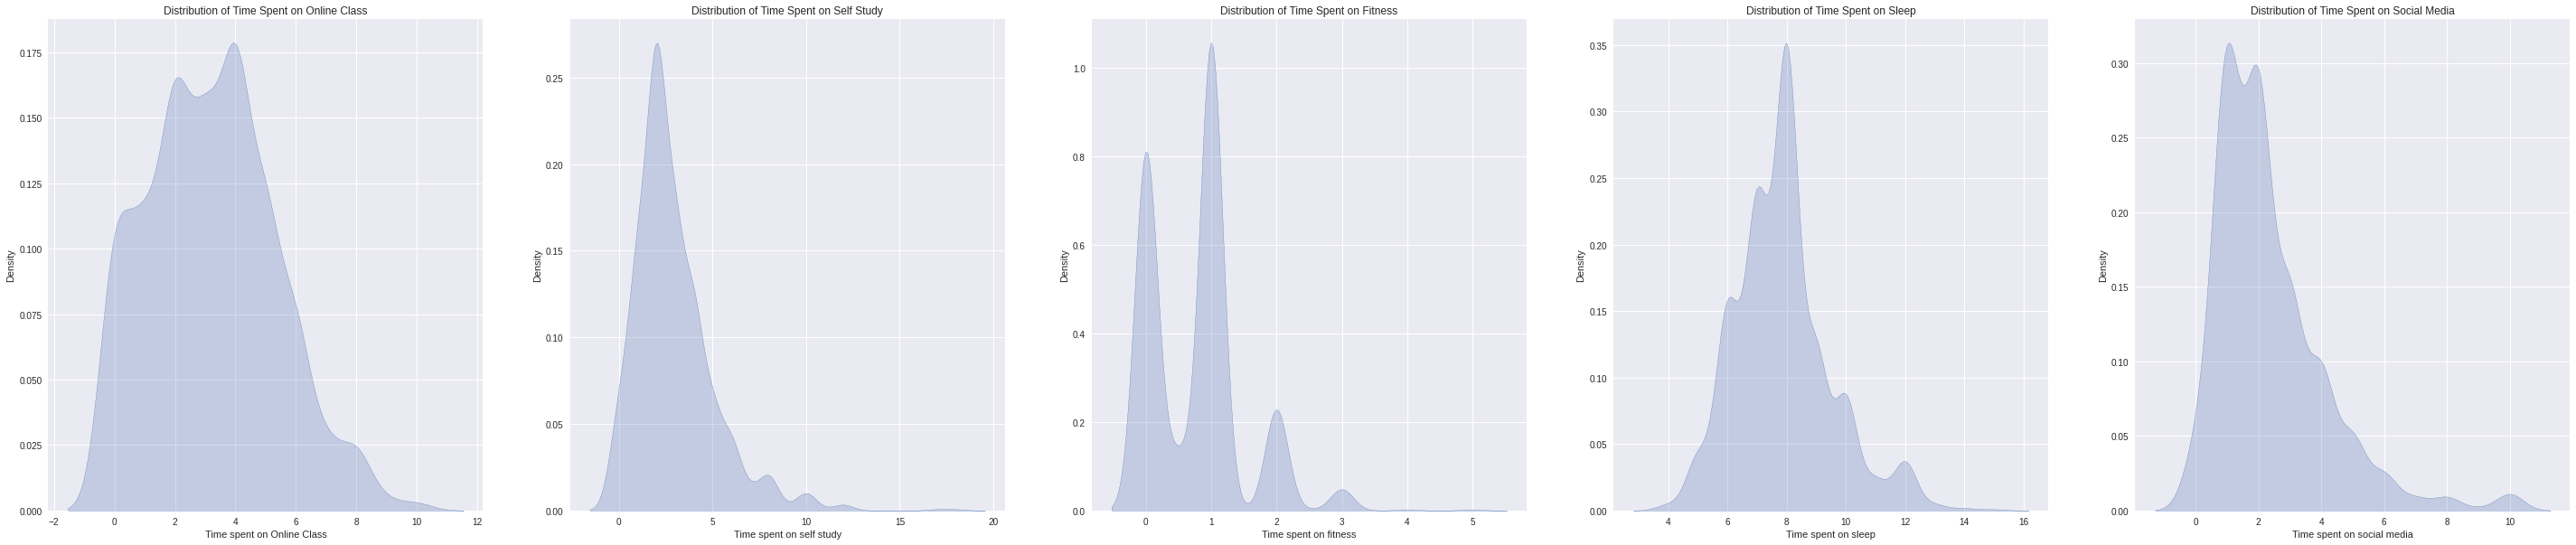

3.2088409475465314


In [ ]:
# Distribution Plot
fig, ax = plt.subplots(1, 5, figsize=(50, 10))
sns.kdeplot(x="Time spent on Online Class", data=df, ax=ax[0], fill=True)
ax[0].set_title("Distribution of Time Spent on Online Class")

sns.kdeplot(x="Time spent on self study", data=df, ax=ax[1], fill=True)
ax[1].set_title("Distribution of Time Spent on Self Study")

sns.kdeplot(x="Time spent on fitness", data=df, ax=ax[2], fill=True)
ax[2].set_title("Distribution of Time Spent on Fitness")

sns.kdeplot(x="Time spent on sleep", data=df, ax=ax[3], fill=True)
ax[3].set_title("Distribution of Time Spent on Sleep")

sns.kdeplot(x="Time spent on social media", data=df, ax=ax[4], fill=True)
ax[4].set_title("Distribution of Time Spent on Social Media")

plt.savefig('Distribution Plot.svg', )
plt.show()

print(np.mean(df['Time spent on Online Class']))


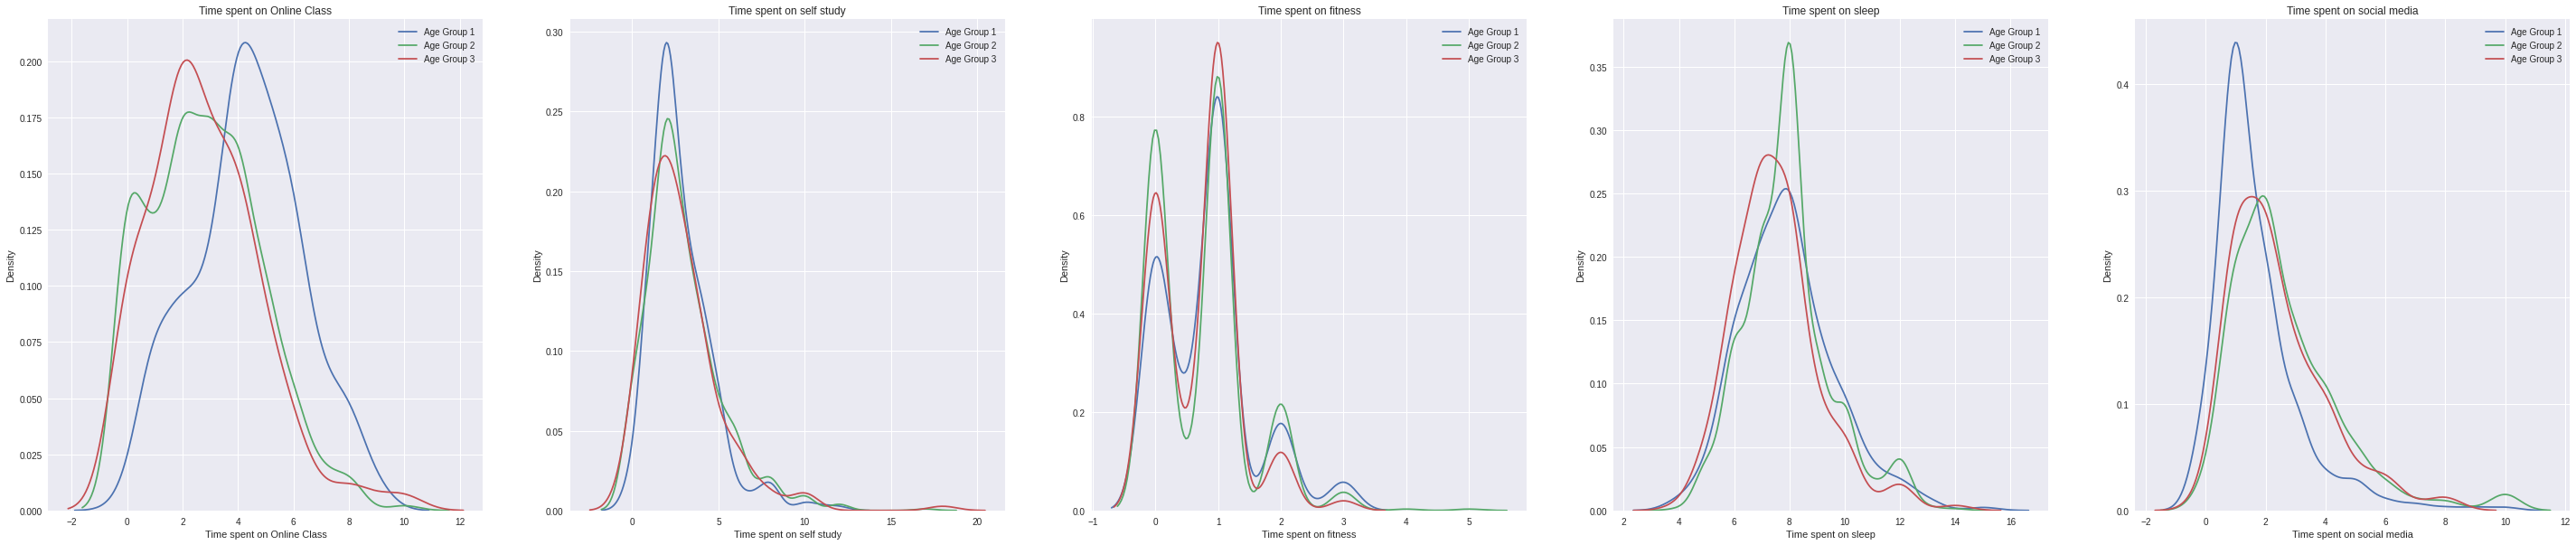

4.3395695364238405
2.8251436781609196
2.8043478260869565


In [ ]:
# Distribution Plot
fig, ax = plt.subplots(1, 5, figsize=(50, 10))
# sns.kdeplot(x="Time spent on Online Class", data=ageGroup1, ax=ax[0], label="Age Group 1")
# sns.kdeplot(x="Time spent on Online Class", data=ageGroup2, ax=ax[0], label="Age Group 2")
# sns.kdeplot(x="Time spent on Online Class", data=ageGroup3, ax=ax[0], label="Age Group 3")
# ax[0].set_title("Distribution of Time Spent on Online Class")

for i, col in enumerate(['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness', 'Time spent on sleep', 'Time spent on social media']):
    sns.kdeplot(x=col, data=ageGroup1, ax=ax[i], label="Age Group 1")
    sns.kdeplot(x=col, data=ageGroup2, ax=ax[i], label="Age Group 2")
    sns.kdeplot(x=col, data=ageGroup3, ax=ax[i], label="Age Group 3")
    ax[i].set_title(col)
    ax[i].legend()

plt.legend()
plt.savefig('Distribution Plot 2.svg', )
plt.show()

print(np.mean(ageGroup1['Time spent on Online Class']))
print(np.mean(ageGroup2['Time spent on Online Class']))
print(np.mean(ageGroup3['Time spent on Online Class']))

In [ ]:
# Table
def distribution_table(df, col, title, step=2):
    print(f"{title}")
    print("    Range: {} - {}".format(min(df[col]), max(df[col])))
    print("    Time interval (Hours/day)")
    for i in np.arange(min(df[col]), max(df[col])-step, step):
        print("      {} <= x < {} : {}".format(i, i+step, len(df[(df[col] >= i) & (df[col] < i + step)])))
    print("      {} <= x <= {} : {}".format(max(df[col])-step, max(df[col]), len(df[df[col] >= max(df[col])-step])))

In [ ]:
distribution_table(df, 'Time spent on Online Class', 'Online Class')
distribution_table(df, 'Time spent on self study', 'Self-Study')
distribution_table(df, 'Time spent on fitness', 'Fitness', 0.5)
distribution_table(df, 'Time spent on sleep', 'Sleep', 2)
distribution_table(df, 'Time spent on social media', 'Social Media', 1)

Online Class
    Range: 0.0 - 10.0
    Time interval (Hours/day)
      0.0 <= x < 2.0 : 271
      2.0 <= x < 4.0 : 381
      4.0 <= x < 6.0 : 367
      6.0 <= x < 8.0 : 123
      8.0 <= x <= 10.0 : 40
Self-Study
    Range: 0.0 - 18.0
    Time interval (Hours/day)
      0.0 <= x < 2.0 : 273
      2.0 <= x < 4.0 : 559
      4.0 <= x < 6.0 : 228
      6.0 <= x < 8.0 : 68
      8.0 <= x < 10.0 : 31
      10.0 <= x < 12.0 : 16
      12.0 <= x < 14.0 : 5
      14.0 <= x < 16.0 : 0
      16.0 <= x <= 18.0 : 2
Fitness
    Range: 0.0 - 5.0
    Time interval (Hours/day)
      0.0 <= x < 0.5 : 430
      0.5 <= x < 1.0 : 55
      1.0 <= x < 1.5 : 550
      1.5 <= x < 2.0 : 0
      2.0 <= x < 2.5 : 119
      2.5 <= x < 3.0 : 1
      3.0 <= x < 3.5 : 25
      3.5 <= x < 4.0 : 0
      4.0 <= x < 4.5 : 1
      4.5 <= x <= 5.0 : 1
Sleep
    Range: 4.0 - 15.0
    Time interval (Hours/day)
      4.0 <= x < 6.0 : 51
      6.0 <= x < 8.0 : 436
      8.0 <= x < 10.0 : 524
      10.0 <= x < 12.0 : 121
      

Average time spent on online class 3.2088409475465314


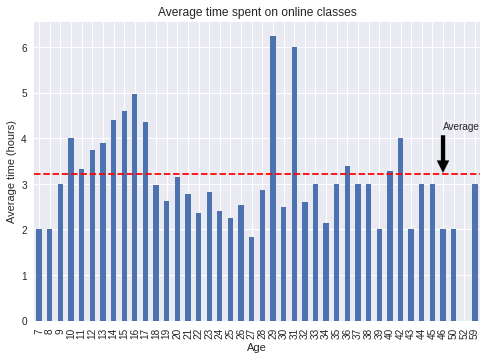

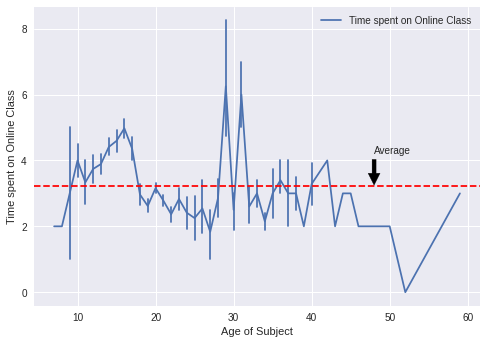

(4.152165820690138, 4.526973252157543)
(2.7002465210374234, 2.950040835284416)
(2.5586107377161023, 3.050084914457811)


In [ ]:
# Average time spent on online classes for different age
x = df['Time spent on Online Class'].mean()
print(f'Average time spent on online class {x}')
df.groupby('Age of Subject')['Time spent on Online Class'].mean().sort_index().plot(kind='bar', title='Average time spent on online classes', xlabel='Age', ylabel='Average time (hours)')
plt.axhline(x, color='r', linestyle='--')
plt.annotate(f'Average', xy=(38, 3.2), xytext=(38, 3.2 + 1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.savefig('Average time spent on online classes.svg', )
plt.show()


sns.lineplot(x='Age of Subject', y='Time spent on Online Class', data=df, label='Time spent on Online Class', err_style='bars', ci=75)
plt.axhline(x, color='r', linestyle='--')
plt.annotate(f'Average', xy=(48, 3.2), xytext=(48, 3.2 + 1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.savefig('Average time spent on online classes 2.svg', )

plt.show()

# st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
print(st.t.interval(0.9, len(ageGroup1['Time spent on Online Class'])-1, loc=np.mean(ageGroup1['Time spent on Online Class']), scale=st.sem(ageGroup1['Time spent on Online Class'])))
print(st.t.interval(0.9, len(ageGroup2['Time spent on Online Class'])-1, loc=np.mean(ageGroup2['Time spent on Online Class']), scale=st.sem(ageGroup2['Time spent on Online Class'])))
print(st.t.interval(0.9, len(ageGroup3['Time spent on Online Class'])-1, loc=np.mean(ageGroup3['Time spent on Online Class']), scale=st.sem(ageGroup3['Time spent on Online Class'])))

Average Score: 2.6286701208981


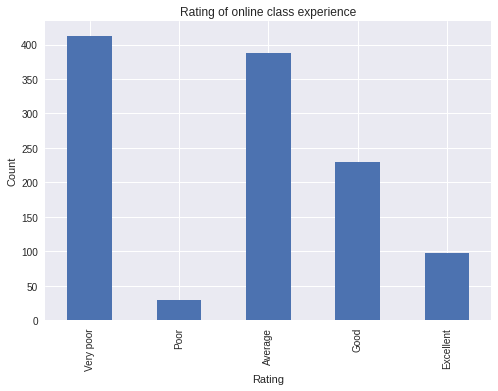

In [ ]:
print('Average Score: {}'.format(np.mean(df['Rating of Online Class experience'])))

df['Rating of Online Class experience'].value_counts(dropna=True).reindex([1, 2, 3, 4, 5]).plot(kind='bar', title='Rating of online class experience', xlabel='Rating', ylabel='Count')
plt.xticks([0, 1, 2, 3, 4], ['Very poor', 'Poor', 'Average', 'Good', 'Excellent'])

plt.savefig('Rating of online class experience.svg', )

plt.show()

Average Score: 2.6286701208981


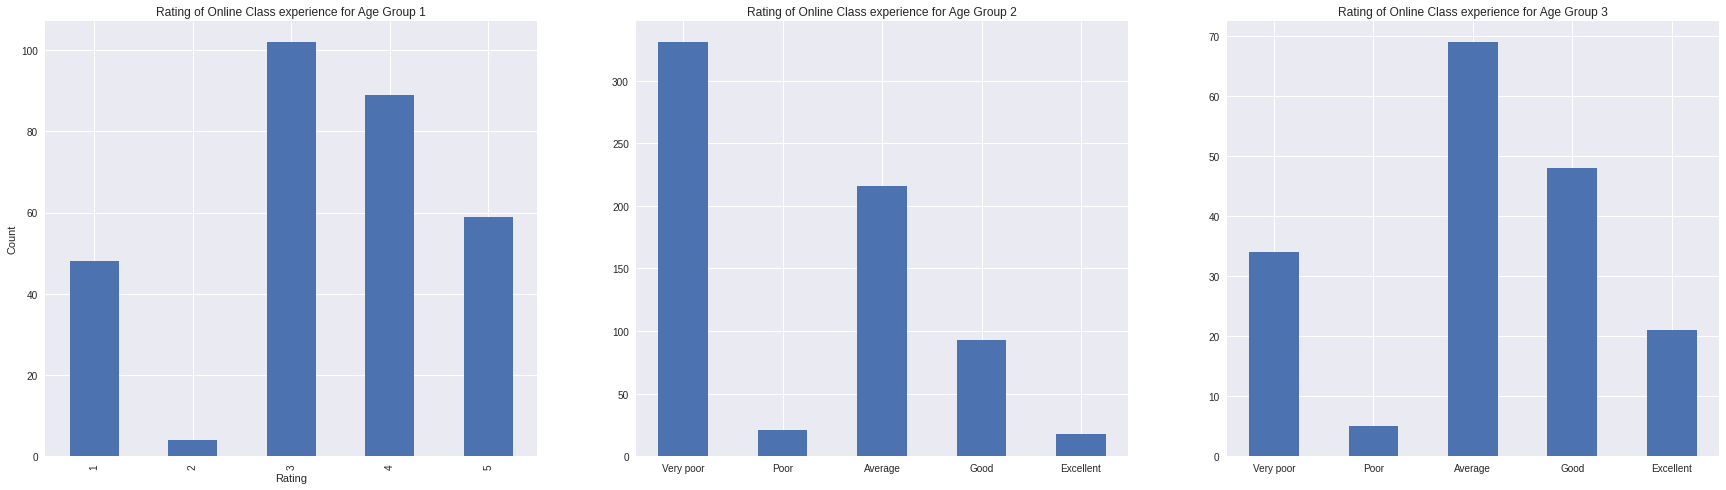

3.3543046357615895 (3.234024751414575, 3.4745845201086043)
2.1840942562592045 (2.1051334185074326, 2.2630550940109764)
3.096045197740113 (2.9417135405797676, 3.250376854900458)


In [ ]:
print('Average Score: {}'.format(np.mean(df['Rating of Online Class experience'])))

fig, ax = plt.subplots(1, 3, figsize=(30, 8))

ageGroup1['Rating of Online Class experience'].value_counts(dropna=True).reindex([1, 2, 3, 4, 5]).plot(kind='bar', title='Rating of online class experience', xlabel='Rating', ylabel='Count', ax=ax[0])

ax[0].bar(['Very poor', 'Poor', 'Average', 'Good', 'Excellent'], ageGroup1['Rating of Online Class experience'].value_counts(dropna=True).reindex([1, 2, 3, 4, 5]), width=0.5)
ax[0].set_title('Rating of Online Class experience for Age Group 1')
ax[1].bar(['Very poor', 'Poor', 'Average', 'Good', 'Excellent'], ageGroup2['Rating of Online Class experience'].value_counts(dropna=True).reindex([1, 2, 3, 4, 5]), width=0.5)
ax[1].set_title('Rating of Online Class experience for Age Group 2')

ax[2].bar(['Very poor', 'Poor', 'Average', 'Good', 'Excellent'], ageGroup3['Rating of Online Class experience'].value_counts(dropna=True).reindex([1, 2, 3, 4, 5]), width=0.5)
ax[2].set_title('Rating of Online Class experience for Age Group 3')

plt.savefig('Rating of online class experience 2.svg', )
plt.show()


print(np.mean(ageGroup1['Rating of Online Class experience']), st.t.interval(0.9, len(ageGroup1['Rating of Online Class experience'])-1, loc=np.mean(ageGroup1['Rating of Online Class experience']), scale=st.sem(ageGroup1['Rating of Online Class experience'])))
print(np.mean(ageGroup2['Rating of Online Class experience']), st.t.interval(0.9, len(ageGroup2.dropna(subset=['Rating of Online Class experience'])['Rating of Online Class experience'])-1, loc=np.mean(ageGroup2.dropna(subset=['Rating of Online Class experience'])['Rating of Online Class experience']), scale=st.sem(ageGroup2.dropna(subset=['Rating of Online Class experience'])['Rating of Online Class experience'])))
print(np.mean(ageGroup3['Rating of Online Class experience']), st.t.interval(0.9, len(ageGroup3.dropna(subset=['Rating of Online Class experience'])['Rating of Online Class experience'])-1, loc=np.mean(ageGroup3.dropna(subset=['Rating of Online Class experience'])['Rating of Online Class experience']), scale=st.sem(ageGroup3.dropna(subset=['Rating of Online Class experience'])['Rating of Online Class experience'])))

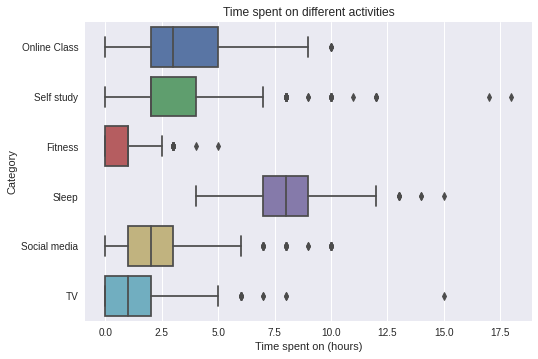

In [ ]:
# Time spent on self study
x = df[['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness', 'Time spent on sleep', 'Time spent on social media', 'Time spent on TV']].melt()

# sns.boxplot(x='variable', y='value', data=x)
sns.boxplot(y='variable', x='value', data=x)
plt.xlabel('Time spent on (hours)')
plt.ylabel('Category')
plt.yticks(range(6), ['Online Class', 'Self study', 'Fitness', 'Sleep', 'Social media', 'TV'])
plt.title('Time spent on different activities')
# sns.violinplot(y='variable', x='value', data=x)
plt.savefig('Time spent on different activities.svg', )
plt.show()

In [ ]:
def scatter_plot(x, y, xlabel, ylabel, title, ax):
    ax.scatter(x, y, s=10, alpha=0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    c = np.corrcoef(x, y)[0, 1]
    print('Pearson Correlation between {} and {}: {:.3f}'.format(xlabel, ylabel, c))

Pearson Correlation between Time spent on Online Class and Time spent on self study: 0.119
Pearson Correlation between Time spent on Online Class and Time spent on fitness: -0.027
Pearson Correlation between Time spent on Online Class and Time spent on sleep: -0.178
Pearson Correlation between Time spent on Online Class and Time spent on social media: -0.117
Pearson Correlation between Time spent on Online Class and Time spent on TV: -0.017
Pearson Correlation between Time spent on Online Class and Number of meals per day: 0.003


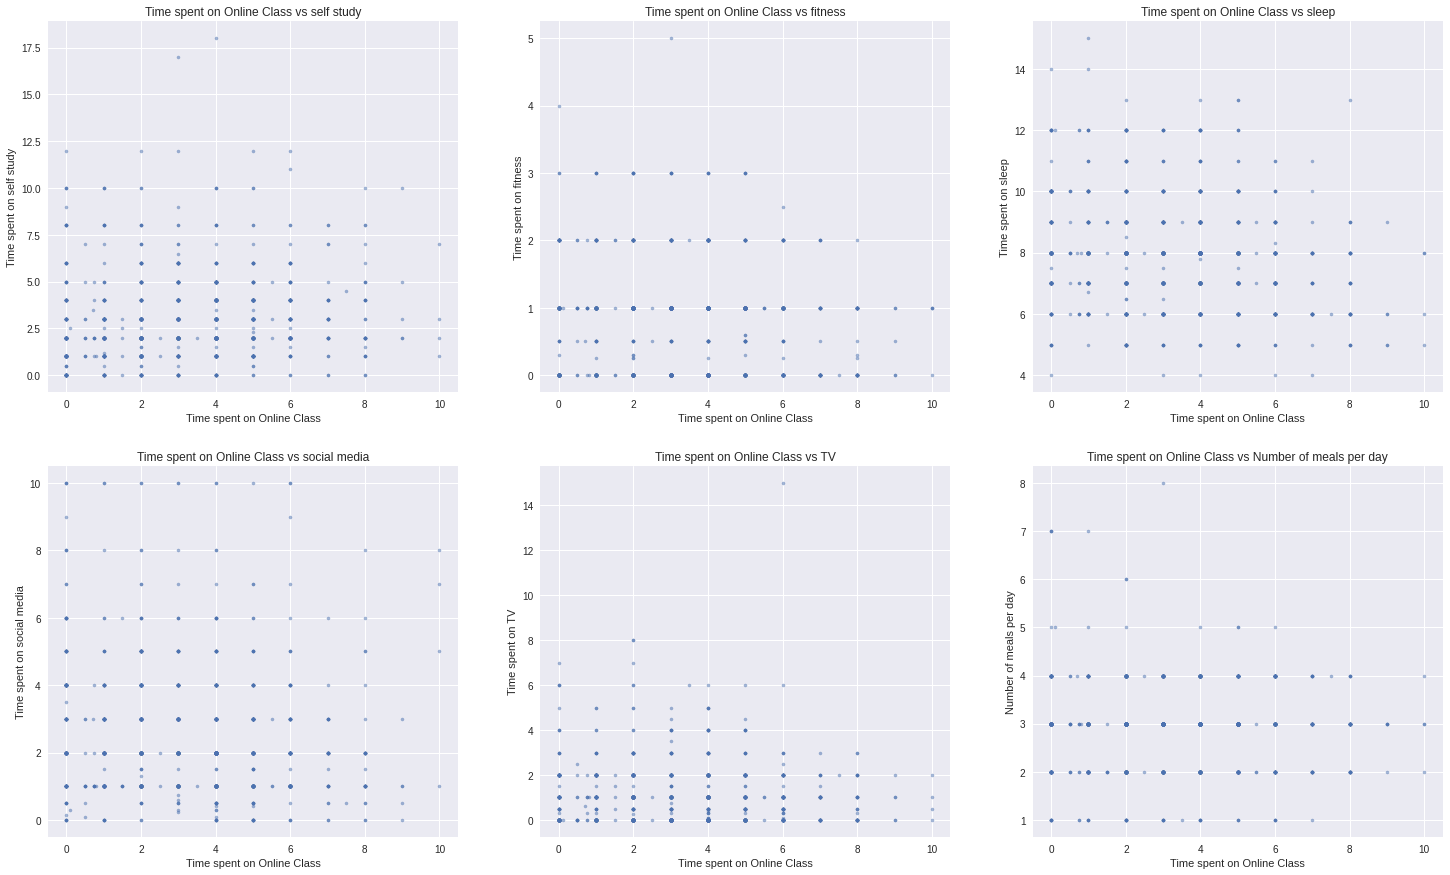

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(25, 15))
scatter_plot(x=df['Time spent on Online Class'], y=df['Time spent on self study'], xlabel='Time spent on Online Class', ylabel='Time spent on self study', title='Time spent on Online Class vs self study', ax=ax[0][0])
scatter_plot(x=df['Time spent on Online Class'], y=df['Time spent on fitness'], xlabel='Time spent on Online Class', ylabel='Time spent on fitness', title='Time spent on Online Class vs fitness', ax=ax[0][1])
scatter_plot(x=df['Time spent on Online Class'], y=df['Time spent on sleep'], xlabel='Time spent on Online Class', ylabel='Time spent on sleep', title='Time spent on Online Class vs sleep', ax=ax[0][2])
scatter_plot(x=df['Time spent on Online Class'], y=df['Time spent on social media'], xlabel='Time spent on Online Class', ylabel='Time spent on social media', title='Time spent on Online Class vs social media', ax=ax[1][0])
scatter_plot(x=df['Time spent on Online Class'], y=df['Time spent on TV'], xlabel='Time spent on Online Class', ylabel='Time spent on TV', title='Time spent on Online Class vs TV', ax=ax[1][1])
scatter_plot(x=df['Time spent on Online Class'], y=df['Number of meals per day'], xlabel='Time spent on Online Class', ylabel='Number of meals per day', title='Time spent on Online Class vs Number of meals per day', ax=ax[1][2])
plt.savefig('Time spent on different activities 2.svg', )
# Remark
# The Pearson correlation measures the strength of the linear relationship between two variables.
# It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.

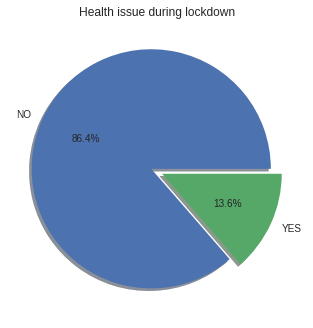

0    1021
1     161
Name: Health issue during lockdown, dtype: int64

In [ ]:
plt.pie(df['Health issue during lockdown'].value_counts(dropna=True), labels=['NO', 'YES'], autopct='%1.1f%%', shadow=True, explode=(0.05, 0.05))
plt.title('Health issue during lockdown')
plt.savefig('Health issue during lockdown.svg', )
plt.show()

df['Health issue during lockdown'].value_counts()

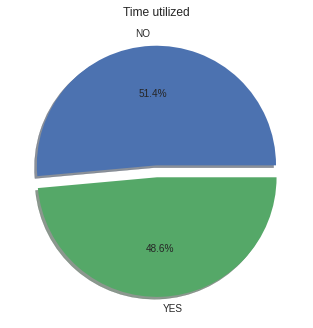

0    608
1    574
Name: Time utilized, dtype: int64

In [ ]:
plt.pie(df['Time utilized'].value_counts(dropna=True), labels=['NO', 'YES'], autopct='%1.1f%%', shadow=True, explode=(0.05, 0.05))
plt.title('Time utilized')
plt.savefig('Time utilized.svg', )
plt.show()

df['Time utilized'].value_counts()

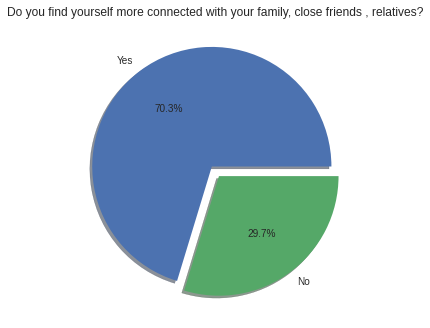

1    831
0    351
Name: Do you find yourself more connected with your family, close friends , relatives  ?, dtype: int64

In [ ]:
plt.pie(df['Do you find yourself more connected with your family, close friends , relatives  ?'].value_counts(dropna=True), labels=['Yes', 'No'], autopct='%1.1f%%', shadow=True, explode=(0.05, 0.05))
plt.title('Do you find yourself more connected with your family, close friends , relatives?')
plt.savefig('Do you find yourself more connected with your family, close friends , relatives.svg')
plt.show()

df['Do you find yourself more connected with your family, close friends , relatives  ?'].value_counts()

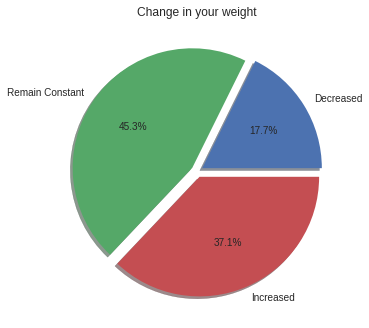

 0.0    535
 1.0    438
-1.0    209
Name: Change in your weight, dtype: int64

In [ ]:
plt.pie(df['Change in your weight'].value_counts(dropna=True).sort_index(), labels=['Decreased', 'Remain Constant', 'Increased'], autopct='%1.1f%%', shadow=True, explode=(0.05, 0.05, 0.05))
plt.title('Change in your weight')
plt.savefig('Change in your weight.svg', )
plt.show()

df['Change in your weight'].value_counts()

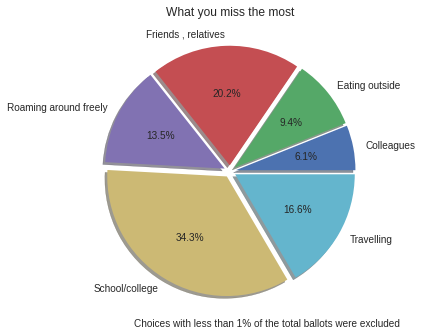

{'Colleagues': 67,
 'Eating outside': 104,
 'Friends , relatives': 223,
 'Roaming around freely': 149,
 'School/college': 379,
 'Travelling': 183}

In [ ]:
tmp = dict(filter(lambda x: x[1] > len(df) * 0.01 , df['What you miss the most'].value_counts(dropna=True).sort_index().iteritems()))

plt.pie(tmp.values(), labels=tmp.keys(), autopct='%1.1f%%', shadow=True, explode=[0.05]*6)
plt.title('What you miss the most')
plt.text(-0.8, -1.3, 'Choices with less than 1% of the total ballots were excluded')
plt.savefig('What you miss the most.svg', )
plt.show()

tmp

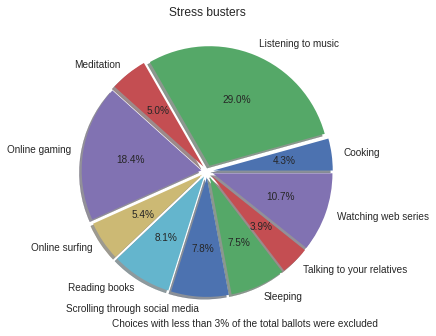

{'Cooking': 41,
 'Listening to music': 276,
 'Meditation': 48,
 'Online gaming': 175,
 'Online surfing': 51,
 'Reading books': 77,
 'Scrolling through social media': 74,
 'Sleeping': 71,
 'Talking to your relatives': 37,
 'Watching web series': 102}

In [ ]:
tmp = dict(filter(lambda x: x[1] > len(df) * 0.03 , df['Stress busters'].value_counts(dropna=True).sort_index().iteritems()))

plt.pie(tmp.values(), labels=tmp.keys(), autopct='%1.1f%%', shadow=True, explode=[0.05]*len(tmp.keys()))
plt.title('Stress busters')
plt.text(-0.8, -1.3, 'Choices with less than 3% of the total ballots were excluded')
plt.savefig('Stress busters.svg', )
plt.show()

tmp

# Decision Tree

In [ ]:
def train_decision_tree(x, y, max_depth, feature_names, filename, class_names=['No', 'Yes'], plot_confusion_matrix=True, two_class=True):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf = clf.fit(x, y)

    # Plotting decision tree
    dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,
                               class_names=class_names, filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data, format="png")
    graph.render(filename)

    y_true = y.copy()
    y_pred = clf.predict(x)

    print(f'Accuracy: {clf.score(x, y)}')
    if two_class:
        print(f'Precision: {precision_score(y_true, y_pred)}')
        print(f'Recall: {recall_score(y_true, y_pred)}') 
    if plot_confusion_matrix:
        # plot confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.title('Confusion matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()


In [ ]:
tmp = dict(filter(lambda x: x[1] <= len(df) * 0.01 , df['What you miss the most'].value_counts(dropna=True).sort_index().iteritems()))
tmpdf = df[~df['What you miss the most'].isin(tmp.keys())]

tmpdf['What you miss the most'].value_counts(dropna=True).sort_index()

Colleagues                67
Eating outside           104
Friends , relatives      223
Roaming around freely    149
School/college           379
Travelling               183
Name: What you miss the most, dtype: int64

Colleagues                67
Eating outside           104
Friends , relatives      223
Roaming around freely    149
School/college           379
Travelling               183
Name: What you miss the most, dtype: int64


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.916021 to fit


Accuracy: 0.648868778280543


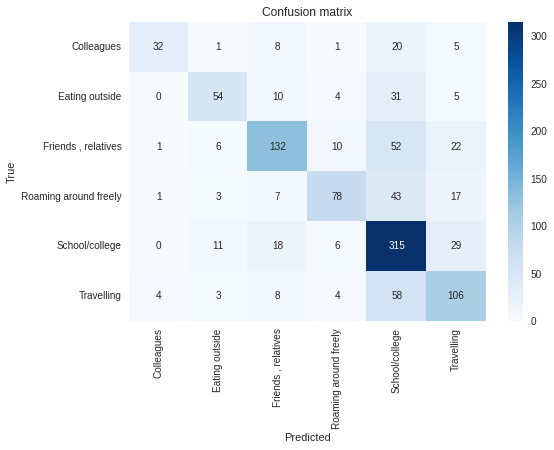

In [ ]:
tmp = dict(filter(lambda x: x[1] <= len(df) * 0.01 , df['What you miss the most'].value_counts(dropna=True).sort_index().iteritems()))
tmpdf = df[~df['What you miss the most'].isin(tmp.keys())]

print(tmpdf['What you miss the most'].value_counts(dropna=True).sort_index())

train_decision_tree(tmpdf[['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                        'Time spent on sleep', 'Time spent on social media', 'Time spent on TV', 'Number of meals per day',]],
                    tmpdf['What you miss the most'],
                    12,
                    ['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                        'Time spent on sleep', 'Time spent on social media', 'Time spent on TV', 'Number of meals per day'],
                    'tree_miss_most',
                    ['Colleagues', 'Eating outside', 'Friends , relatives', 'Roaming around freely', 'School/college', 'Travelling'],
                    two_class=False)

Accuracy: 0.8908629441624365
Precision: 0.9
Recall: 0.2236024844720497


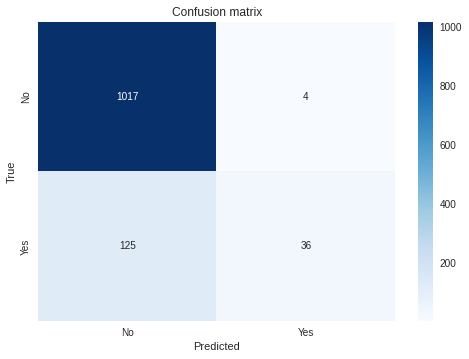

In [ ]:
# Health issue during lockdown

train_decision_tree(df[['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                        'Time spent on sleep', 'Time spent on social media', 'Time spent on TV', 'Number of meals per day']],
                    df['Health issue during lockdown'],
                    7,
                    ['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                     'Time spent on sleep', 'Time spent on social media', 'Time spent on TV', 'Number of meals per day'],
                    'tree1')

Accuracy: 0.5642978003384095


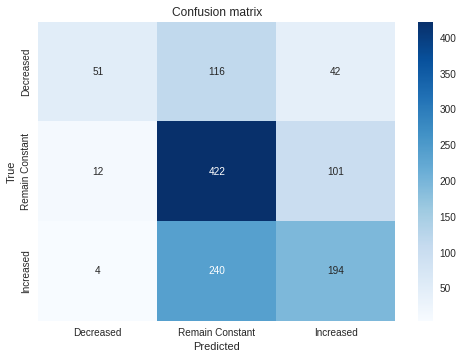

-1.0    209
 0.0    535
 1.0    438
Name: Change in your weight, dtype: int64


In [ ]:
# Change in your weight

train_decision_tree(df[['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                        'Time spent on sleep', 'Time spent on social media', 'Time spent on TV', 'Number of meals per day']],
                    df['Change in your weight'],
                    7,
                    ['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                     'Time spent on sleep', 'Time spent on social media', 'Time spent on TV', 'Number of meals per day'],
                    'tree2',
                    ['Decreased', 'Remain Constant', 'Increased'],
                    two_class = False)

print(df['Change in your weight'].value_counts(dropna=True).sort_index())

Accuracy: 0.7123519458544839
Precision: 0.6762048192771084
Recall: 0.7822299651567944


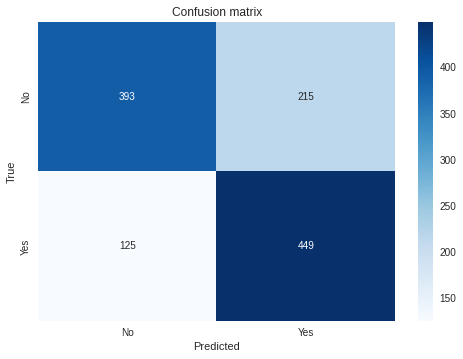

In [ ]:
# Time utilized

train_decision_tree(df[['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                        'Time spent on sleep', 'Time spent on social media', 'Time spent on TV', 'Number of meals per day']],
                    df['Time utilized'],
                    7,
                    ['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                     'Time spent on sleep', 'Time spent on social media', 'Time spent on TV', 'Number of meals per day'],
                    'tree3')

Accuracy: 0.766497461928934
Precision: 0.7665706051873199
Recall: 0.9602888086642599


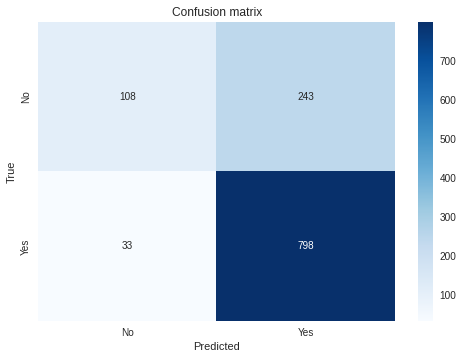

In [ ]:
# Do you find yourself more connected with your family, close friends , relatives  ?
train_decision_tree(df[['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                        'Time spent on sleep', 'Time spent on social media', 'Time spent on TV', 'Number of meals per day']],
                    df['Do you find yourself more connected with your family, close friends , relatives  ?'],
                    7,
                    ['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                     'Time spent on sleep', 'Time spent on social media', 'Time spent on TV', 'Number of meals per day'],
                    'tree3')

# Regression